In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime
import random
from statsmodels.stats.power import tt_ind_solve_power

def date_converter(x):
    return datetime.datetime.strptime(x,'%Y-%m-%d')

Срок выполнения задания: 17 марта 17:00.


### Задание
Вам предстоит разработать дизайн эксперимента по тестированию монетизационных продуктов.
В конечном счёте, в монтизационных продуктах нас всегда интересует увеличение выручки, 
но к сожалению не всегда мы можем зафиксировать изменение именно этой метрики.

#### Кейс
Вы аналитик в продуктовой дискавери команде.
На текущий момент приближается начало нового квартала и вам необходимо спланировать
эксперименты в нём.

У вас есть два продукта:
- один базовый продукт, который предоставляет минимальный набор услуг на вашем ресурсе;
- один продвинутый продукт, который предоставляет расширенный набор услуг.

На текущий момент на квартал у вашей команды есть для проверки две гипотезы:
- Дополнительное информирование об эффективности услуг будет стимулировать их покупку;
- Повышение цены базового продукта должно стимулировать покупку продвинутого продукта


#### Для планирования эксперимента изучите данные и метрики (2 балла):

- Загрузите файл и изучите данные;
- Подумайте над тем, какие метрики можно выделить на основе этих данных: выручка, пользователи, транзакции, средний чек и т.д.
- Постройте графики плотности распределения для этих метрик и сделайте выводы о характере распределений: тип, наличие выбросов, насколько сильный разброс;
- Изучите основные статистики этих метрик: среднее, стандартное отклонение;
- Изучите то, насколько эти статистики подвержены сезональности.


#### Формализуйте гипотезы (4 балла):

- Опишите метрики и статистики, изменение которых вы ожидаете;
- Предположите какое относительное изменение этих статистик в процентах вы ожидаете.

#### Предскажите минимально детектируемый эффект для своих метрик и спланируйте эксперименты внутри квартала (4 балла):

- Принимая в расчёт максимально возможные размеры групп и ограничения по длительности в квартал рассмотрите разные планы проведения тестов и предскажите их чувствительность;
- Определите наиболее оптимальный план экспериментов. Обоснуйте, почему вы его считаете оптимальным.


#### * Оптимизация плана (2 балла):
Предложите варианты ускорения экспериментов — всегда могут образоваться ситуации, когда ваши гипотезы не подтвердились и они требуют изменения или уточнения и необходимости повторных тестов. Цели достигать всегда хорошо в рамках отведённого на них срока. Какие параметры экспериментов вы поменяете? К каким последствиям могут привести такие изменения?

#### Описание данныx

event_date - дата 

user_id - идентификатор пользователя

product - тип продукта

amount - сумма покупок

transactions - количество транзакций


In [2]:
df = pd.read_csv('user_transactions.csv')
df['event_date']=df.event_date.apply(date_converter)

In [7]:
df['aov'] = df.apply(lambda row: row.amount/row.transactions, axis = 1) #Делаем столбец со средним чеком

In [8]:
df.head(10)

,event_date,user_id,product,amount,transactions,aov
0,2020-09-29,40746820883461494,basic,95.0,1,95.0
1,2020-09-29,41102328408008828,advanced,279.0,1,279.0
2,2020-09-29,63464894315144075,basic,64.0,1,64.0
3,2020-09-29,111526991873455341,basic,399.0,1,399.0
4,2020-09-29,169522572963414231,basic,199.0,1,199.0
5,2020-09-29,198859200434938543,basic,89.0,1,89.0
6,2020-09-29,238808923434750914,basic,79.0,1,79.0
7,2020-09-29,256797328216193669,basic,229.0,1,229.0
8,2020-09-29,303768977694772373,basic,70.0,1,70.0
9,2020-09-29,314919079237057602,advanced,280.0,1,280.0


Можно проверить следующие метрики: выручка (сумма amount по user_id дает выручку на одного пользователя), число транзакций (сумма transactions по user_id даст число транзакций на пользователя) и средний чек (сумма aov по user_id/число транзакций по user_id).

In [55]:
#Агрегируем по обоим продуктам 
df_aggs = df.groupby(['user_id']).agg({'transactions': 'sum', 'amount': 'sum', 'aov': 'sum'})
df_aggs['aov'] = df_aggs['aov']/df_aggs['transactions']
df_aggs.head(10)

,transactions,amount,aov
user_id,,,
1809139296429,1,980.0,980.000
1912219714366,3,300.0,100.000
23708868092799,16,1094.0,68.375
45305541518475,2,158.0,79.000
51991933272698,2,199.0,99.500
87029396555710,1,159.0,159.000
88433173713624,5,245.0,49.000
119592742492283,4,140.0,8.750
126676868571860,1,50.0,50.000


<AxesSubplot:ylabel='Frequency'>

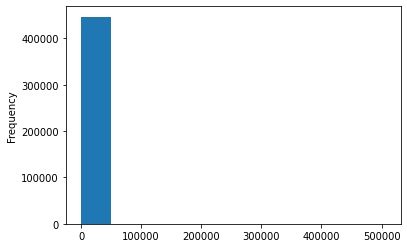

In [37]:
df_aggs['amount'].plot.hist(bins = 10)

<AxesSubplot:ylabel='Frequency'>

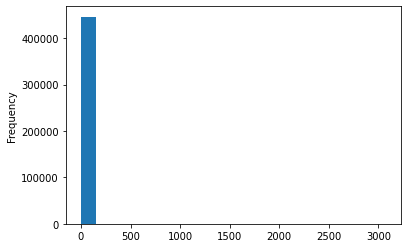

In [38]:
df_aggs['transactions'].plot.hist(bins = 20)

<AxesSubplot:ylabel='Frequency'>

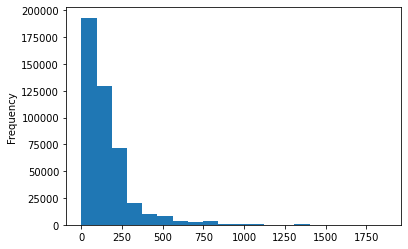

In [56]:
df_aggs['aov'].plot.hist(bins = 20)

[(0.0, 12.0)]

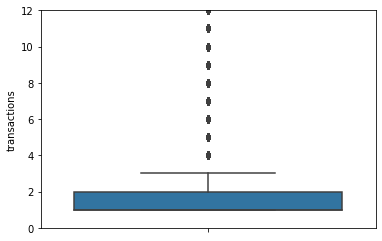

In [53]:
ax = sns.boxplot(y = df_aggs['transactions'], orient = 'v')
ax.set(ylim = (0,12))

[(0.0, 1000.0)]

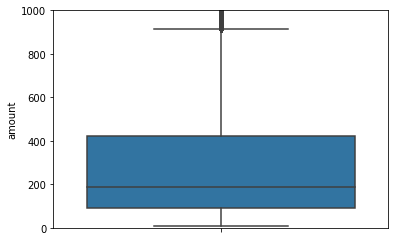

In [49]:
ax = sns.boxplot(y = df_aggs['amount'], orient = 'v')
ax.set(ylim = (0,1000))

[(0.0, 1000.0)]

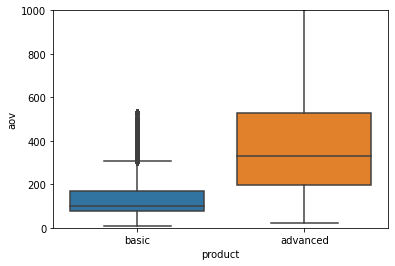

In [50]:
ax = sns.boxplot(x =  df['product'], y= df['aov'], orient = 'v')
ax.set(ylim = (0,1000))

По боксплотам видно, что выбросы есть у всех метрик, при этом очень большой размах у advanced продукта. Также большой размах у выручки (amount), когда агрегируются оба продукта. Гистограммы показывают, что подавляющее большинство значений "относительно малы" у транзакций и выручки. При этом распределение среднего чека похоже на экспоненциальное.

In [66]:
df_aggs.describe()

,transactions,amount,aov
count,446935.000000,446935.000000,446935.000000
mean,3.696954,684.835016,157.627664
std,16.522523,4082.887730,156.129391
min,1.000000,8.000000,0.680556
25%,1.000000,89.000000,69.333333
50%,1.000000,189.000000,100.000000
75%,2.000000,420.000000,199.000000
max,3070.000000,506454.000000,1869.000000


Описательные статистики также показывают, что у транзакций и выручки есть выбросы, которые сильно выбиваются из основной массы наблюдений (например, 3 первых квартиля у транзакций имеют значения <= 2). 

Как было сказано выше, можно проверить следующие метрики: выручка (сумма amount по user_id дает выручку на одного пользователя), число транзакций (сумма transactions по user_id даст число транзакций на пользователя) и средний чек (сумма aov по user_id/число транзакций по user_id). При этом стоит разделить типы продуктов. Действительно, одна из наших гипотез включает повышение цен на базовый тип продукта, поэтому мы можем ожидать того, что движение части метрик у базового и продвинутого продуктов будут иметь противоположные направления.

Каких изменений стоит ожидать:
    
1. Вырастет средний чек на пользователя у базового продукта - действительно, вторая гипотеза состоит в том, что мы повышаем цену на базовый продукт. При прочих равных, это увеличит средний чек на продукт. В процентах это изменение будет примерно следующим: ((увеличение стоимости подписки/среднее число транзакций)/средний чек)*100%
2. Упадет число пользователей базового продукта (и число транзакций с базовым продуктом): с одной стороны мы увеличиваем число пользователей (первая гипотеза), но при этом стимулируем и новых пользователей переходить на продвинутый продукт повышением цены на базовый. Заранее сложно сказать, насколько сильным будет это изменение. Можно посчитать эластичность спроса по цене, зная цену продукта (где спрос = число транзакций). В таком случае % изменения пользователей = эластичность умножить на изменение цены (в процентах).
3. Аналогично можно предположить, что вырастет число пользователей продвинутого продукта (и число транзакций). Опять же процентное изменение можно посчитать при помощи перекрестной эластичности (продуктом-заменителем выступает базовая версия продукта).
4. Выручка должна вырасти: мы увеличиваем и число пользователей, и число подписок на продвинутую версию продукта, хотя и уменьшится число подписок на базовую версию. Если мы знаем конверсию, а также эластичность (сколько пользователей перейдут с базовой на продвинутую), то можно попытаться оценить рост выручки в процентах. 

In [67]:
#Создадим отдельные датасеты для базовой и продвинутой подписок
df_basic = df[df['product'] == 'basic']
df_advanced = df[df['product'] == 'advanced']

In [69]:
#Вспомагательная функция для расчета размера выборки 
def choose_date(data, start_date, delta, share): 
    tmp = data[(data.event_date>=start_date)&(data.event_date<=start_date+datetime.timedelta(days=delta))]
    tmp=tmp.groupby(['user_id']).sum().reset_index()
    x = tmp[(tmp.user_id)%100<=100*share].reset_index()
    return x

In [85]:
#Посмотрим, сколько дней нужно для детектирования изменения числа транзакций базового продукта (изменение одной транзакции от среднего ~ 0.33)

x1 =choose_date(df_basic, datetime.datetime(2020, 9, 29, 0, 0),1,0.5) #получаем необходимую подвыборку, берем половину пользователей 


mean = x1.transactions.mean()
std = x1.transactions.std()
 
alpha = 0.01
power = 0.8
result_effect = -0.33 # целевой размер относительного отклоенения исходной метрики
effect_size = (mean /std) * result_effect
 
    
sample_vol = tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, nobs1=None, ratio=1, alternative = 'two-sided')    
print(sample_vol/x1.shape[0])# получаем множитель того, во сколько раз необходимо изменить размер выборки

0.0313161517877994


In [106]:
#Посмотрим, сколько дней нужно для детектирования изменения числа транзакций продвинутого продукта (изменение одной транзакции от среднего ~ 0.33)

x1 =choose_date(df_advanced, datetime.datetime(2020, 9, 29, 0, 0),1,0.5) #получаем необходимую подвыборку, берем половину пользователей 


mean = x1.transactions.mean()
std = x1.transactions.std()
 
alpha = 0.01
power = 0.8
result_effect = -0.33 # целевой размер относительного отклоенения исходной метрики
effect_size = (mean /std) * result_effect
 
    
sample_vol = tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, nobs1=None, ratio=1, alternative = 'two-sided')    
print(sample_vol/x1.shape[0])# получаем множитель того, во сколько раз необходимо изменить размер выборки

0.085293816423148


Видим, что даже одного дня достаточно, чтобы задетектировать такие изменения, поэтому транзакции можно включить в эксперимент.

In [101]:
#Средний чек для базового, поймаем ли изменение в 5%

x1 =choose_date(df_basic, datetime.datetime(2020, 9, 29, 0, 0),1,0.5) #получаем необходимую подвыборку, берем половину пользователей 


mean = x1.aov.mean()
std = x1.aov.std()
 
alpha = 0.01
power = 0.8
result_effect = -0.05 # целевой размер относительного отклоенения исходной метрики
effect_size = (mean /std) * result_effect
 
    
sample_vol = tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, nobs1=None, ratio=1, alternative = 'two-sided')    
print(sample_vol/x1.shape[0])# получаем множитель того, во сколько раз необходимо изменить размер выборки

0.4560121371655364


Видим, что опять же изменение среднего чека на 5% детектируется довольно быстро.

In [105]:
#Средний чек для продвинутого, поймаем ли изменение в 5%

x1 =choose_date(df_advanced, datetime.datetime(2020, 9, 29, 0, 0),90,0.5) #получаем необходимую подвыборку, берем половину пользователей 


mean = x1.aov.mean()
std = x1.aov.std()
 
alpha = 0.01
power = 0.8
result_effect = -0.05 # целевой размер относительного отклоенения исходной метрики
effect_size = (mean /std) * result_effect
 
    
sample_vol = tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, nobs1=None, ratio=1, alternative = 'two-sided')    
print(sample_vol/x1.shape[0])# получаем множитель того, во сколько раз необходимо изменить размер выборки

1.7396743725933945


Для продвинутого продукта средний чек не детектируется за квартал, так что не включаем в эксперимент. Проверим выручку.

In [114]:
#Выручка для базового, поймаем ли изменение в 5%

x1 =choose_date(df_basic, datetime.datetime(2020, 9, 29, 0, 0),90,0.5) #получаем необходимую подвыборку, берем половину пользователей 


mean = x1.amount.mean()
std = x1.amount.std()
 
alpha = 0.01
power = 0.8
result_effect = -0.05 # целевой размер относительного отклоенения исходной метрики
effect_size = (mean /std) * result_effect
 
    
sample_vol = tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, nobs1=None, ratio=1, alternative = 'two-sided')    
print(sample_vol/x1.shape[0])# получаем множитель того, во сколько раз необходимо изменить размер выборки

1.2162210408906706


Выручка для базового не детектируется.

In [118]:
#Выручка для продвинутого, поймаем ли изменение в 5%

x1 =choose_date(df_advanced, datetime.datetime(2020, 9, 29, 0, 0),90,0.5) #получаем необходимую подвыборку, берем половину пользователей 


mean = x1.amount.mean()
std = x1.amount.std()
 
alpha = 0.01
power = 0.8
result_effect = -0.05 # целевой размер относительного отклоенения исходной метрики
effect_size = (mean /std) * result_effect
 
    
sample_vol = tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, nobs1=None, ratio=1, alternative = 'two-sided')    
print(sample_vol/x1.shape[0])# получаем множитель того, во сколько раз необходимо изменить размер выборки

4.859481089927956


Выручка опять же не детектируется, попробуем для обоих продуктов.

In [119]:
#Выручка для продвинутого, поймаем ли изменение в 5%

x1 =choose_date(df, datetime.datetime(2020, 9, 29, 0, 0),90,0.5) #получаем необходимую подвыборку, берем половину пользователей 


mean = x1.amount.mean()
std = x1.amount.std()
 
alpha = 0.01
power = 0.8
result_effect = -0.05 # целевой размер относительного отклоенения исходной метрики
effect_size = (mean /std) * result_effect
 
    
sample_vol = tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, nobs1=None, ratio=1, alternative = 'two-sided')    
print(sample_vol/x1.shape[0])# получаем множитель того, во сколько раз необходимо изменить размер выборки

1.5657408365031915


Опять же не детектируется, чувствительность денежных метрик: среднего чека и выручки оставляет желать лучшего. Быстро можно отловить изменение числа транзакций и средний чек базового продукта - это как раз даст прокси для выручки. Для продвинутого продукта стоит снизить чувствительность и попытаться поймать бОльшее изменение. Поэтому эксперимент может быть таким:

1) Запускаем для базового продукта (детектируем изменение среднего чека и числа транзакций)
2) На продвинутом смотрим на изменение числа транзакций, либо соглашаемся на меньшую чувствительность и детектируем средний чек/выручку.

Запуски лучше не делать короткими (делать хотя бы по месяцу), поскольку запускаем в начале года - есть большая вероятность нарваться на сезонный эффект начала года и поймать эти эффекты.

Можно постараться оптимизировать посредством уменьшения чувствительности, а также пытаться поймать эффект не по отдельным продуктам, а сразу по обоим - в таком случае получим больше пользователей в выборке - меньше доверительный интервал - больше чувствительность. Из рисков такого решения то, что мы можем допустить ошибку второго рода: реальное изменение было на 4%, а мы решили детектировать 10%, тогда реальное изменение пропускаем и принимаем ошибочное решение, что гипотезы неверны.